In [1]:
import spacy
from spacy import displacy

from preprocessing import (
    WordCaser,
    PolishLemmatizer,
    PolishLetterReplacer,
    PunctuationRemover,
    StopWordsRemover,
    CurrencyRemover,
    UnitsRemover,
    NumberReplacer,
    WhitespaceRemover
)

nlp = spacy.load('pl_core_news_lg')

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

import pyLDAvis.sklearn

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('polish_dataset.csv')
dataset.head()

,description,length,rate
0,Polecam nie pierwszy i nie ostatni raz!,39.0,1.0
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121.0,1.0
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87.0,1.0
3,0,0.0,0.0
4,Jestem w pełni zadowolona z przebiegu transakcji,48.0,1.0


In [4]:
del dataset['length']
del dataset['rate']
dataset = dataset[dataset.description != 0]
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936254 entries, 0 to 936882
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  936254 non-null  object
dtypes: object(1)
memory usage: 14.3+ MB


In [5]:
dataset = dataset.head(1000)

In [6]:
additional_punctuation = ['\\.', '\\+', '/', '%']


preprocessing_pipe = make_pipeline(
    WordCaser(),
    PolishLemmatizer(),
    PolishLetterReplacer(),
    PunctuationRemover(additional_punctuation=additional_punctuation),
    StopWordsRemover(),
    CurrencyRemover(),
    UnitsRemover(),
    NumberReplacer(),
    WhitespaceRemover()
)

description_transformed = preprocessing_pipe.fit_transform(dataset['description'].values)

In [7]:
description_transformed

['polecac pierwszy ostatni',
 'dobry komunikacja sms telefoniczny zamowiony towar wyslany termin zabezpieczony polecac sklep',
 'polecac zakup sklep dostepny czesc stary model np lodowka',
 '#NUMBER',
 'pelnia zadowolony przebieg transakcja',
 'transakcja przebiec blyskawicznie pelny profesjonalizm polecac sklep',
 'obsluga godny polecenie klient tranzakcja przebiec szybko bezproblemowo',
 'obsluga czas realizacja poziom zapakowania paczka wzorcowo polecac',
 'sprawnie bezproblemowo',
 'transakcja przebiegac b sprawnie produkt przesylka b szybko polecac',
 'pierwszy odebrac przesylka paczkomat wrocic sprzedawca sklep wyslac ponownie przesylka dodatkowy oplata p l e c',
 'dobry kontakt sklep szybki wysylka nastepny dzien wplata miec produkt zamawiac szyba piekarnik dokladnie zabezpieczona polecac',
 'sprawnie milo polecac zdarzyc blad reklamacja zalatwiac reka problem',
 'transakcja przebiec pomyslnie',
 'rzetelny konkretny elastyczny obsluga wyrozumiec decyzja kupujacego polecac potrze

In [8]:
tfidf_max_df = 1.0
tfidf_min_df = 10

In [10]:
count_vectorizer = CountVectorizer(
        max_df=tfidf_max_df,
        min_df=tfidf_min_df,
        ngram_range=(2, 2))

In [11]:
X_count_vectorized = count_vectorizer.fit_transform(description_transformed)

In [12]:
X_count_vectorized

<1000x56 sparse matrix of type '<class 'numpy.int64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [13]:
lda = LatentDirichletAllocation(
        n_components=20,
        max_iter=20,
        learning_method='batch',
        n_jobs=-1)

In [14]:
X_lda = lda.fit_transform(X_count_vectorized)

In [15]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(
    lda,
    X_count_vectorized,
    count_vectorizer,
    mds='tsne'
)
dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
16     -10.878068   10.538728       1        1  10.793706
6      -60.884026  -75.591820       2        1   8.089375
14      -2.336119  -53.289074       3        1   7.593616
13     -61.385319  -12.914634       4        1   7.537667
18     -28.737743  126.296997       5        1   7.227636
7        1.066606 -123.552811       6        1   6.483413
3       45.140720   -7.947869       7        1   5.890116
5     -140.795975  -98.530548       8        1   5.338762
19      61.531681  -83.240562       9        1   4.793092
4      -72.563057 -140.396881      10        1   4.482531
12      15.984491   63.578186      11        1   3.987335
1     -160.851624   68.945145      12        1   3.809850
8       85.961830   51.922935      13        1   3.618413
17     -99.020836  109.936348      14        1   3.320793
10    -176.764130   -8.681684      15        1   3.305974
9     -117.189880  -37.420200      16        1   3.226276
2      108.829918  -22.946203      17        1   3.146932
0       47.588097  121.934814      18        1   2.892157
15    -106.467834   30.176889      19        1   2.288394
11     -50.613804   59.328842      20        1   2.173963, topic_info=                     Term        Freq       Total Category  logprob  loglift
20  profesjonalny obsluga  117.000000  117.000000  Default  30.0000  30.0000
46    transakcja przebiec  102.000000  102.000000  Default  29.0000  29.0000
44        szybko sprawnie   84.000000   84.000000  Default  28.0000  28.0000
41         szybki wysylka   46.000000   46.000000  Default  27.0000  27.0000
45           towar zgodny   59.000000   59.000000  Default  26.0000  26.0000
..                    ...         ...         ...      ...      ...      ...
7                north pl    0.094593   26.641005  Topic20  -5.8171  -1.8120
9         obsluga polecac    0.094593   40.360704  Topic20  -5.8171  -2.2274
12           opis polecac    0.094593   18.583946  Topic20  -5.8171  -1.4518
15          polecac sklep    0.094593   40.015722  Topic20  -5.8171  -2.2188
16          polecac zakup    0.094593   51.056997  Topic20  -5.8171  -2.4625

[945 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
0        11  0.904398  bezproblemowo polecac
1         3  0.662252          dobry kontakt
1        12  0.094607          dobry kontakt
1        13  0.094607          dobry kontakt
2        18  0.955735         dobry porzadek
...     ...       ...                    ...
53       14  0.952555     zgodnie zamowienie
54        1  0.972060            zgodny opis
55        1  0.655244      zgodny zamowienie
55        5  0.093606      zgodny zamowienie
55        8  0.234016      zgodny zamowienie

[77 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 7, 15, 14, 19, 8, 4, 6, 20, 5, 13, 2, 9, 18, 11, 10, 3, 1, 16, 12])

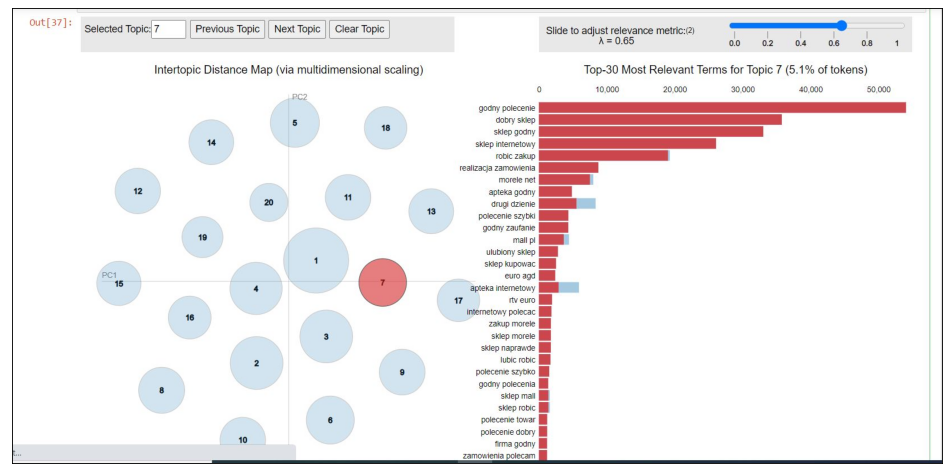

In [16]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
image = mpimg.imread("LDA1.jpg")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_params = {
    'min_df': 5,
    'max_df': 0.95,
    'ngram_range': (2, 2)
}

tfidf_vectorizer = TfidfVectorizer(**tfidf_params)
tfidf = tfidf_vectorizer.fit_transform(description_transformed)

In [19]:
from sklearn.model_selection import GridSearchCV
import numpy as np
lda_params = {
    'learning_method': 'batch',
    'max_iter': 100,
    'perp_tol': 0.1,
    'evaluate_every': 1
}

lda = LatentDirichletAllocation(**lda_params)

lda_changing_params = {
    'n_components': np.arange(5, 41, 1)
}
clf = GridSearchCV(lda, lda_changing_params, cv=5, refit=True, n_jobs=-1, verbose=3)
clf.fit(tfidf)
cv_results_df = pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


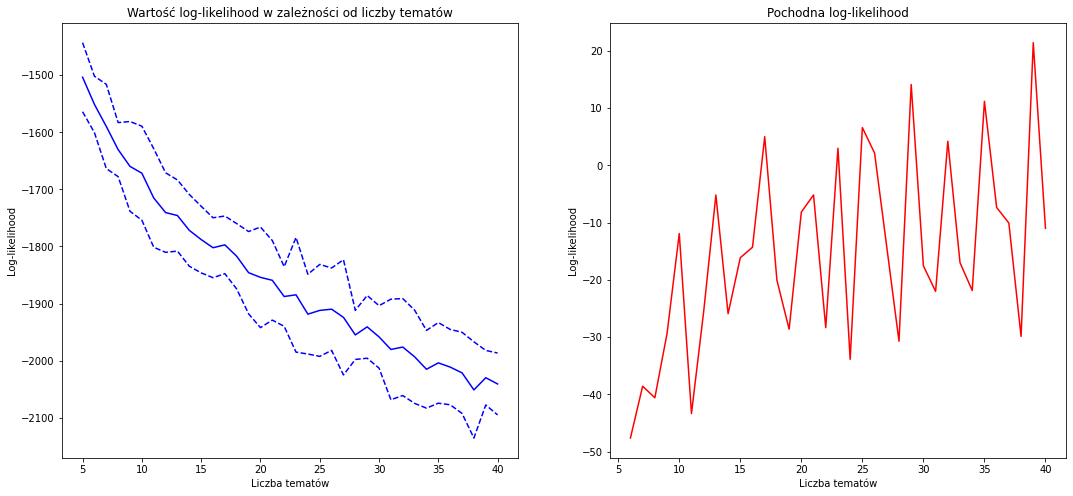

In [20]:
x = cv_results_df['param_n_components']
y_lower = cv_results_df['mean_test_score'] - 2 * cv_results_df['std_test_score']
y_mean = cv_results_df['mean_test_score']
y_upper = cv_results_df['mean_test_score'] + 2 * cv_results_df['std_test_score']

y_diff_lower = y_lower[1:].values - y_lower[:-1].values
y_diff_mean = y_mean[1:].values - y_mean[:-1].values
y_diff_upper = y_upper[1:].values - y_upper[:-1].values

plt.figure(figsize=[18, 8])
plt.subplot(121)
plt.xlabel('Liczba tematów')
plt.ylabel('Log-likelihood')
plt.title('Wartość log-likelihood w zależności od liczby tematów')
plt.plot(x, y_lower, 'b--')
plt.plot(x, y_mean, 'b')
plt.plot(x, y_upper, 'b--')

plt.subplot(122)
plt.xlabel('Liczba tematów')
plt.ylabel('Log-likelihood')
plt.title('Pochodna log-likelihood')
#plt.plot(x[1:], y_diff_lower, 'r--')
plt.plot(x[1:], y_diff_mean, 'r')
#plt.plot(x[1:], y_diff_upper, 'r--')
plt.show()

In [21]:
lda_params = {
    'learning_method': 'batch',
    'n_components': 10,
    'max_iter': 100,
    'perp_tol': 0.1,
    'evaluate_every': 1
}

lda = LatentDirichletAllocation(**lda_params)
lda_results = lda.fit_transform(tfidf)

def show_topics(vectorizer, lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(tfidf_vectorizer, lda)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = [f'Bigram {i+1}' for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = [f'Temat {i+1}' for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T

,Temat 1,Temat 2,Temat 3,Temat 4,Temat 5,Temat 6,Temat 7,Temat 8,Temat 9,Temat 10
Bigram 1,transakcja przebiec,goraco polecac,north pl,profesjonalnie szybko,polecac zakup,obsluga szybki,profesjonalny obsluga,szybko sprawnie,zgodny opis,polecac sklep
Bigram 2,szybko profesjonalnie,dobry porzadek,problem polecac,obsluga klient,zakup sklep,szybki dostawa,obsluga polecac,przebiec szybko,towar zgodny,wysoki poziom
Bigram 3,przebiec pomyslnie,opis polecac,sprawnie szybko,szybko polecac,realizacja zamowienie,profesjonalny obsluga,szybki profesjonalny,transakcja przebiec,szybki wysylka,szybko sprawnie
Bigram 4,przebiec problem,super szybko,przebiec blyskawicznie,zgodnie zamowienie,transakcja szybki,szybki przesylka,szybki obsluga,zgodny zamowienie,nastepny dzien,sprawnie polecac
Bigram 5,profesjonalnie polecac,polecac number,transakcja przebiec,zgodnie oczekiwanie,szybki realizacja,dobry kontakt,polecac zakup,sprawnie problem,wysylka polecac,sprawnie profesjonalnie
Bigram 6,przebiec sprawnie,zgodnie opis,dobry sklep,profesjonalny podejscie,dostawa polecac,szybko bezproblemowo,zakup sklep,godny polecenie,pelny profesjonalizm,bezproblemowo polecac
Bigram 7,pomyslnie polecac,szybko zgodnie,strona internetowy,sprawnie zgodnie,profesjonalny obsluga,realizacja polecac,obsluga profesjonalny,polecac szybko,szybki sprawny,sprawnie bezproblemowo
Bigram 8,kolejny zakup,sklep internetowy,number godzina,dostawa towar,zamowienie polecac,super polecac,polecic sklep,sklep godny,duzy wybor,obsluga szybko
Bigram 9,szybki czas,porzadek polecac,towar dotrzec,sklep polecac,szybki przyjemny,szybki transakcja,obsluga blyskawiczny,drugi dzienie,wysylka towar,serdecznie polecac
Bigram 10,pomyslnie towar,zgodny opis,przebiec sprawnie,przesylka dotrzec,sklep transakcja,transakcja towar,szybko problem,zamowienie polecac,dobry jakosc,przebiec bezproblemowo
